<a href="https://colab.research.google.com/github/Renata-Thomazelli/mentoria2021/blob/main/wheat_production_thousand_tonnes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Analysing the wheat production***

---

In [1]:
# Importing Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing 
import pandas as pd
import numpy as np
import chardet
import missingno as msno

## Reading CSV

---

In [3]:

file_path ='/content/drive/MyDrive/Data_Lake/wheat_production/'
file = 'paises_fechados_2.csv'

Reading encoding

In [4]:
with open(f"{file_path}{file}", 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

Reading CSV

In [5]:
with open (f"{file_path}{file}",'r',encoding=r_encoding['encoding']) as countries:
  df_countries = pd.read_csv(countries)


# Dataframe

**A Alemanha e a França não constam na base original dos países com produção de Trigo**

---

In [6]:
df_countries

,Country,Australia,Brazil,Canada,China,Egypt,India,Indonesia,Philippines,Russia,Turkey,United Kingdom,United States
0,Commodity,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat,Wheat
1,Attribute,Production,Production,Production,Production,Production,Production,Production,Production,Production,Production,Production,Production
2,Frequency,A,A,A,A,A,A,A,A,A,A,A,A
3,1960-01-01,7450.0,350.0,14108.0,20960.0,1499.0,10320.0,0.0,0.0,NaN,7000.0,NaN,36877.0
4,1961-01-01,6727.0,250.0,7713.0,14250.0,1436.0,10995.0,0.0,0.0,NaN,6336.0,NaN,33557.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2017-01-01,20941.0,4264.0,30377.0,134334.0,8450.0,98510.0,0.0,0.0,85167.0,21000.0,14444.0,47380.0
61,2018-01-01,17598.0,5428.0,32352.0,131430.0,8450.0,99870.0,0.0,0.0,71685.0,19000.0,13455.0,51306.0
62,2019-01-01,15200.0,5200.0,32670.0,133590.0,8770.0,103600.0,0.0,0.0,73610.0,17500.0,15600.0,52581.0
63,2020-01-01,33000.0,6250.0,35183.0,134250.0,8900.0,107860.0,0.0,0.0,85354.0,18250.0,9658.0,49691.0


## Renomeando as Colunas e dropando níveis desnecessários

---

In [7]:
def replace (col): 
    return col.replace("-01-01",'')

In [8]:
df_countries.shape

(65, 13)

In [9]:
anos = {"Country":"Years"}
df_countries=\
(
    df_countries.drop(range(0,3))
    .rename(columns=anos)
    .set_index("Years")
    .rename(index=replace)
 )


In [10]:
df_countries.shape

(62, 12)

In [11]:
df_countries

,Australia,Brazil,Canada,China,Egypt,India,Indonesia,Philippines,Russia,Turkey,United Kingdom,United States
Years,,,,,,,,,,,,
1960,7450.0,350.0,14108.0,20960.0,1499.0,10320.0,0.0,0.0,NaN,7000.0,NaN,36877.0
1961,6727.0,250.0,7713.0,14250.0,1436.0,10995.0,0.0,0.0,NaN,6336.0,NaN,33557.0
1962,8353.0,256.0,15392.0,16665.0,1593.0,12076.0,0.0,0.0,NaN,6804.0,NaN,29719.0
1963,8925.0,100.0,19690.0,18475.0,1493.0,10779.0,0.0,0.0,NaN,7892.0,NaN,31216.0
1964,10037.0,226.0,16349.0,20840.0,1500.0,9854.0,0.0,0.0,NaN,7000.0,NaN,34917.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,20941.0,4264.0,30377.0,134334.0,8450.0,98510.0,0.0,0.0,85167.0,21000.0,14444.0,47380.0
2018,17598.0,5428.0,32352.0,131430.0,8450.0,99870.0,0.0,0.0,71685.0,19000.0,13455.0,51306.0
2019,15200.0,5200.0,32670.0,133590.0,8770.0,103600.0,0.0,0.0,73610.0,17500.0,15600.0,52581.0


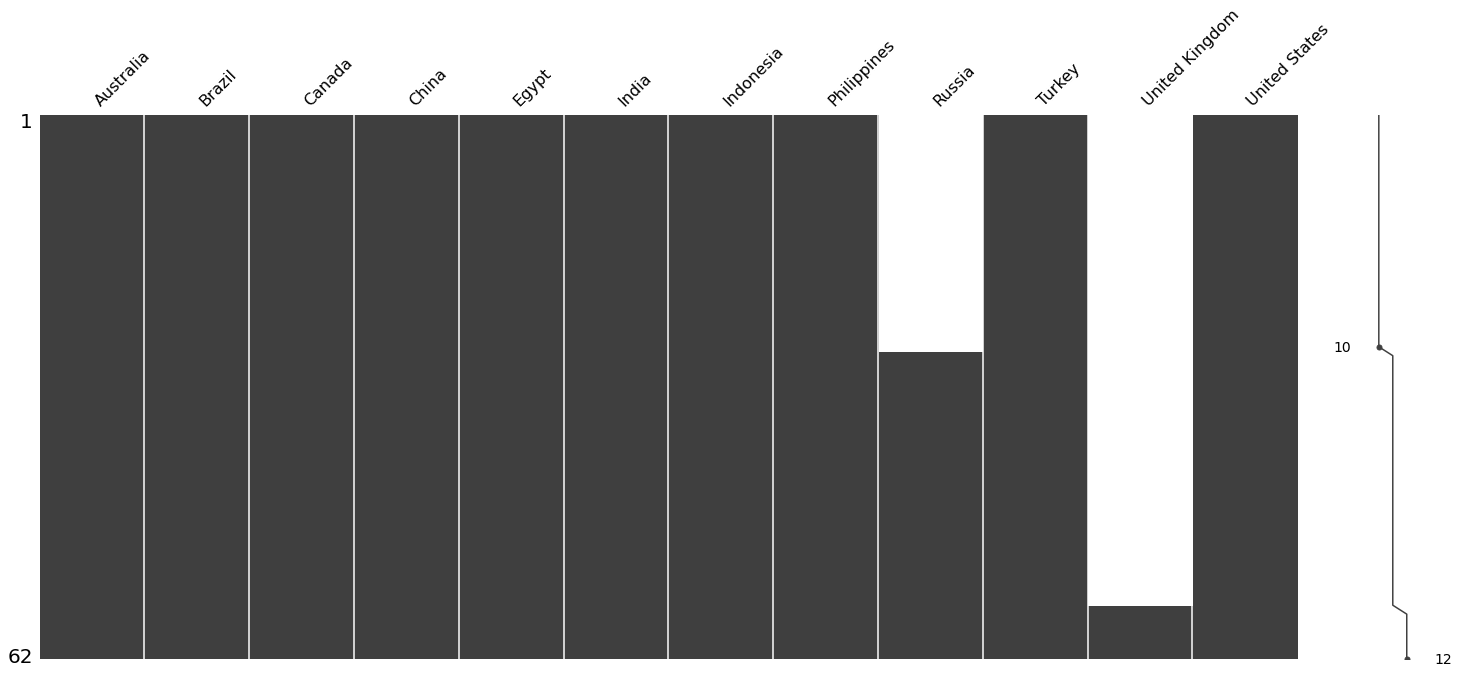

In [12]:
msno.matrix(df_countries)

In [13]:
df_countries.isna().sum()

Australia          0
Brazil             0
Canada             0
China              0
Egypt              0
India              0
Indonesia          0
Philippines        0
Russia            27
Turkey             0
United Kingdom    56
United States      0
dtype: int64

In [14]:
#fillna and changing types
df_countries =\
(
    df_countries.fillna(0)
    .astype(float)
    .astype(int)
   
)



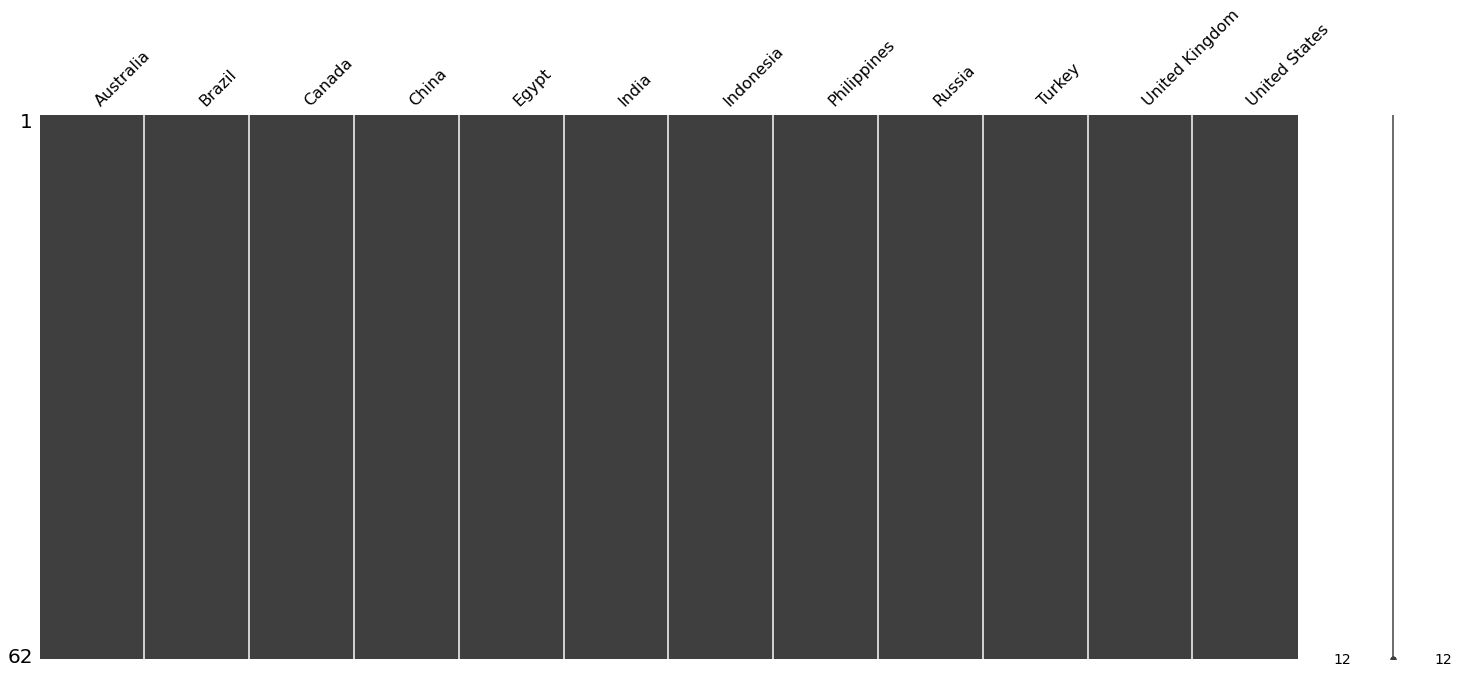

In [18]:
msno.matrix(df_countries)

In [15]:
df_countries_max=\
(
    df_countries
    .T.style.highlight_max(color='lightgreen')
  
  
)
df_countries_max

Years,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Australia,7450,6727,8353,8925,10037,7067,12699,7547,14804,10546,7890,8606,6590,11987,11357,11982,11800,9370,18090,16188,10856,16360,8876,22016,18666,16167,16119,12369,14060,14214,15066,10557,16184,16479,8903,16504,22925,19224,21465,24757,22108,24299,10132,26132,21905,25173,10822,13569,21420,21834,27410,29905,22856,25303,23743,22275,31819,20941,17598,15200,33000,27000
Brazil,350,250,256,100,226,222,299,365,694,1146,1735,2034,694,2031,2858,1788,3216,2066,2691,2879,2676,2217,1849,2100,2030,4300,5600,6100,5800,5550,3300,3078,2739,2107,2138,1526,3195,2380,2188,2403,1660,3250,2925,5851,5845,4873,2234,3825,5880,5026,5900,5800,4380,5300,6000,5540,6730,4264,5428,5200,6250,6800
Canada,14108,7713,15392,19690,16349,17674,22516,16137,17689,18267,9024,14412,14514,16159,13295,17078,23587,19862,21145,17185,19291,24802,26715,26465,21188,24252,31359,25945,15913,24796,32098,31946,29871,27226,22920,24989,29801,24280,24082,26941,26536,20630,15961,23049,24796,25748,25265,20090,28619,26950,23300,25288,27246,37589,29442,27647,32140,30377,32352,32670,35183,32000
China,20960,14250,16665,18475,20840,25220,25280,28485,27455,27285,29185,32575,35985,35225,40865,45310,50385,41075,53840,62730,55210,59640,68470,81390,87815,85810,90040,87764,85432,90807,98229,96000,101590,106390,99300,102215,110570,123289,109726,113880,99640,93873,90290,86490,91952,97445,108466,109525,112932,115834,116141,118625,122540,123710,128321,132639,133271,134334,131430,133590,134250,136000
Egypt,1499,1436,1593,1493,1500,1272,1465,1299,1526,1277,1519,1729,1616,1837,1883,2033,1960,1697,1933,1856,1796,1938,2017,1996,1815,1873,1929,2443,2839,3183,4286,4482,4617,4780,4100,5700,5735,5850,6104,6350,6350,6130,6300,6443,7177,8184,8274,7379,7977,8523,7200,8400,8500,8250,8300,8100,8100,8450,8450,8770,8900,9000
India,10320,10995,12076,10779,9854,12258,10394,11393,16540,18651,20093,23832,26410,24735,21778,24104,28846,29010,31749,35508,31830,36313,37452,42794,45476,44069,47052,44323,46169,54110,49850,55134,55690,57210,59840,65470,62097,69350,66350,71288,76369,69681,72766,65761,72156,68637,69355,75807,78570,80679,80804,86874,94882,93506,95850,86527,87000,98510,99870,103600,107860,108000
Indonesia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Philippines,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Russia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36868,39864,44004,49596,38900,46170,43500,32100,30100,34900,44250,27012,30995,34455,46982,50609,34070,45434,47615,44927,49368,63765,61770,41508,56240,37720,52091,59080,61044,72529,85167,71685,73610,85354,85000
Turkey,7000,6336,6804,7892,7000,7430,8200,9000,8400,8300,8000,10700,9500,8000,8300,11500,13000,13500,13300,13000,13000,13200,13800,13300,13300,12700,14000,13000,16000,12500,16000,16500,15500,16500,14700,15500,16000,16000,18000,16500,18000,15500,16800,16800,18500,18500,17500,15500,16800,18450,17000,18800,16000,18750,15250,19500,17250,21000,19000,17500,18250,17250


In [16]:
df_countries_min=\
(
    df_countries[df_countries.loc[:,:]>0]
    .T.style.highlight_min(color='lightblue')
  
  
)
df_countries_min

Years,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Australia,7450.000000,6727.000000,8353.000000,8925.000000,10037.000000,7067.000000,12699.000000,7547.000000,14804.000000,10546.000000,7890.000000,8606.000000,6590.000000,11987.000000,11357.000000,11982.000000,11800.000000,9370.000000,18090.000000,16188.000000,10856.000000,16360.000000,8876.000000,22016.000000,18666.000000,16167.000000,16119.000000,12369.000000,14060.000000,14214.000000,15066.000000,10557.000000,16184.000000,16479.000000,8903.000000,16504.000000,22925.000000,19224.000000,21465.000000,24757.000000,22108.000000,24299.000000,10132.000000,26132.000000,21905.000000,25173.000000,10822.000000,13569.000000,21420.000000,21834.000000,27410.000000,29905.000000,22856.000000,25303.000000,23743.000000,22275.000000,31819.000000,20941.000000,17598.000000,15200.000000,33000.000000,27000.000000
Brazil,350.000000,250.000000,256.000000,100.000000,226.000000,222.000000,299.000000,365.000000,694.000000,1146.000000,1735.000000,2034.000000,694.000000,2031.000000,2858.000000,1788.000000,3216.000000,2066.000000,2691.000000,2879.000000,2676.000000,2217.000000,1849.000000,2100.000000,2030.000000,4300.000000,5600.000000,6100.000000,5800.000000,5550.000000,3300.000000,3078.000000,2739.000000,2107.000000,2138.000000,1526.000000,3195.000000,2380.000000,2188.000000,2403.000000,1660.000000,3250.000000,2925.000000,5851.000000,5845.000000,4873.000000,2234.000000,3825.000000,5880.000000,5026.000000,5900.000000,5800.000000,4380.000000,5300.000000,6000.000000,5540.000000,6730.000000,4264.000000,5428.000000,5200.000000,6250.000000,6800.000000
Canada,14108.000000,7713.000000,15392.000000,19690.000000,16349.000000,17674.000000,22516.000000,16137.000000,17689.000000,18267.000000,9024.000000,14412.000000,14514.000000,16159.000000,13295.000000,17078.000000,23587.000000,19862.000000,21145.000000,17185.000000,19291.000000,24802.000000,26715.000000,26465.000000,21188.000000,24252.000000,31359.000000,25945.000000,15913.000000,24796.000000,32098.000000,31946.000000,29871.000000,27226.000000,22920.000000,24989.000000,29801.000000,24280.000000,24082.000000,26941.000000,26536.000000,20630.000000,15961.000000,23049.000000,24796.000000,25748.000000,25265.000000,20090.000000,28619.000000,26950.000000,23300.000000,25288.000000,27246.000000,37589.000000,29442.000000,27647.000000,32140.000000,30377.000000,32352.000000,32670.000000,35183.000000,32000.000000
China,20960.000000,14250.000000,16665.000000,18475.000000,20840.000000,25220.000000,25280.000000,28485.000000,27455.000000,27285.000000,29185.000000,32575.000000,35985.000000,35225.000000,40865.000000,45310.000000,50385.000000,41075.000000,53840.000000,62730.000000,55210.000000,59640.000000,68470.000000,81390.000000,87815.000000,85810.000000,90040.000000,87764.000000,85432.000000,90807.000000,98229.000000,96000.000000,101590.000000,106390.000000,99300.000000,102215.000000,110570.000000,123289.000000,109726.000000,113880.000000,99640.000000,93873.000000,90290.000000,86490.000000,91952.000000,97445.000000,108466.000000,109525.000000,112932.000000,115834.000000,116141.000000,118625.000000,122540.000000,123710.000000,128321.000000,132639.000000,133271.000000,134334.000000,131430.000000,133590.000000,134250.000000,136000.000000
Egypt,1499.000000,1436.000000,1593.000000,1493.000000,1500.000000,1272.000000,1465.000000,1299.000000,1526.000000,1277.000000,1519.000000,1729.000000,1616.000000,1837.000000,1883.000000,2033.000000,1960.000000,1697.000000,1933.000000,1856.000000,1796.000000,1938.000000,2017.000000,1996.000000,1815.000000,1873.000000,1929.000000,2443.000000,2839.000000,3183.000000,4286.000000,4482.000000,4617.000000,4780.000000,4100.000000,5700.000000,5735.000000,5850.000000,6104.000000,6350.000000,6350.00

In [17]:
#checking the usage
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 1960 to 2021
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Australia       62 non-null     int64
 1   Brazil          62 non-null     int64
 2   Canada          62 non-null     int64
 3   China           62 non-null     int64
 4   Egypt           62 non-null     int64
 5   India           62 non-null     int64
 6   Indonesia       62 non-null     int64
 7   Philippines     62 non-null     int64
 8   Russia          62 non-null     int64
 9   Turkey          62 non-null     int64
 10  United Kingdom  62 non-null     int64
 11  United States   62 non-null     int64
dtypes: int64(12)
memory usage: 8.8+ KB


*DADOS ESTATÍSTICOS*

---

In [19]:
estatistica = \
(
    df_countries.describe(include=[np.number])
    .T
    .astype(int)
    .sort_values('max',ascending=False)

)
estatistica

,count,mean,std,min,25%,50%,75%,max
China,62,81563,38683,14250,42133,90548,112341,136000
India,62,53294,29405,9854,27019,54622,75046,108000
Russia,62,28359,27883,0,0,33085,47456,85354
United States,62,54305,11406,29719,47615,55969,62351,75805
Canada,62,23379,6491,7713,17833,24266,27241,37589
Australia,62,16519,6893,6590,10623,16143,21988,33000
Turkey,62,14017,3950,6336,11750,15375,16950,21000
United Kingdom,62,1316,4098,0,0,0,0,15600
Egypt,62,4506,2863,1272,1820,4193,7334,9000
Brazil,62,3195,2003,100,1894,2798,5275,6800


In [20]:
df_countries.sort_index(ascending = False)


,Australia,Brazil,Canada,China,Egypt,India,Indonesia,Philippines,Russia,Turkey,United Kingdom,United States
Years,,,,,,,,,,,,
2021,27000,6800,32000,136000,9000,108000,0,0,85000,17250,14100,50948
2020,33000,6250,35183,134250,8900,107860,0,0,85354,18250,9658,49691
2019,15200,5200,32670,133590,8770,103600,0,0,73610,17500,15600,52581
2018,17598,5428,32352,131430,8450,99870,0,0,71685,19000,13455,51306
2017,20941,4264,30377,134334,8450,98510,0,0,85167,21000,14444,47380
...,...,...,...,...,...,...,...,...,...,...,...,...
1964,10037,226,16349,20840,1500,9854,0,0,0,7000,0,34917
1963,8925,100,19690,18475,1493,10779,0,0,0,7892,0,31216
1962,8353,256,15392,16665,1593,12076,0,0,0,6804,0,29719


In [21]:
#Verificando as colunas
col = df_countries.columns
col

Index(['Australia', 'Brazil', 'Canada', 'China', 'Egypt', 'India', 'Indonesia',
       'Philippines', 'Russia', 'Turkey', 'United Kingdom', 'United States'],
      dtype='object')

##***The Top producer of each Year***

---

In [22]:
tops_for_year=\
(
    df_countries.reset_index()
    .melt(id_vars = ["Years"],var_name="Countries",value_name = "Production")
    .sort_values("Production", ascending= False)
    .drop_duplicates(subset="Years")
    .set_index("Years")
)
tops_for_year

,Countries,Production
Years,,
2021,China,136000
2017,China,134334
2020,China,134250
2019,China,133590
2016,China,133271
...,...,...
1965,United States,34917
1964,United States,34917
1961,United States,33557


In [23]:
counting_zeros= (df_countries.reset_index().eq(0).sum())
counting_zeros

Years              0
Australia          0
Brazil             0
Canada             0
China              0
Egypt              0
India              0
Indonesia         62
Philippines       62
Russia            27
Turkey             0
United Kingdom    56
United States      0
dtype: int64

In [24]:
counting_no_zeros=df_countries.reset_index().astype(bool).sum(axis=0)
counting_no_zeros



Years             62
Australia         62
Brazil            62
Canada            62
China             62
Egypt             62
India             62
Indonesia          0
Philippines        0
Russia            35
Turkey            62
United Kingdom     6
United States     62
dtype: int64

In [25]:
lista =[]

for i,v in counting_no_zeros.iteritems():
  if v !=0:
    lista.append(i)


print(lista)


['Years', 'Australia', 'Brazil', 'Canada', 'China', 'Egypt', 'India', 'Russia', 'Turkey', 'United Kingdom', 'United States']


## ***The last-placed producer at each year***

---

In [26]:
last_for_years=\
(
    #dataframe original
    df_countries.reset_index()
    #filtering years and countries that have no zero in the entire column
    .filter(items=lista)
    #unpivoting
    .melt(id_vars = ["Years"],var_name="Countries",value_name = "Production")
    #sorting_values
    .sort_values(["Years","Production"], ascending= [False,True])
  )
    
last_for_years

                




,Years,Countries,Production
123,2021,Brazil,6800
309,2021,Egypt,9000
557,2021,United Kingdom,14100
495,2021,Turkey,17250
61,2021,Australia,27000
...,...,...,...
0,1960,Australia,7450
310,1960,India,10320
124,1960,Canada,14108
186,1960,China,20960


In [27]:
last_for_years=\
(
    last_for_years.loc[last_for_years["Production"]>0,:]
    #drop duplicates
    .drop_duplicates(subset="Years")
    #setting the index
    .set_index("Years")

)

last_for_years

,Countries,Production
Years,,
2021,Brazil,6800
2020,Brazil,6250
2019,Brazil,5200
2018,Brazil,5428
2017,Brazil,4264
...,...,...
1964,Brazil,226
1963,Brazil,100
1962,Brazil,256


Os arquivos gerados estão no mesmo caminho deste Colab

In [28]:
tops_for_year.to_csv("tops_year_producer.csv")
last_for_years.to_csv("last_placed_years_producer.csv")